
# **House Price Prediction Project**



![Acceuil](img/house.jpg)


## Author
Abraham KOLOBOE
* Email : <abklb27@gmail.com>
* Linkedin : [Abraham KOLOBOE](https://www.linkedin.com/in/abraham-koloboe-630683263)

This project aims to predict house prices using the "House Price Prediction" dataset. The PyCaret framework was employed to streamline the creation, training, and evaluation of prediction models.

## Project Description
The primary objective of this project is to develop a model capable of accurately predicting house prices based on various features. The "House Price Prediction" dataset contains information about different characteristics of houses along with their corresponding prices. This project explores how to leverage PyCaret to automate the modeling and evaluation process.

## Prerequisites
Make sure you have Python 3.x installed along with the following libraries:

* PyCaret
* Pandas
* Numpy
* Matplotlib
* Seaborn

Install the dependencies by running:


* pip install pycaret pandas numpy matplotlib seaborn

## About PyCaret
PyCaret is an open-source machine learning library that greatly simplifies the process of model creation, selection, training, and evaluation. It provides a user-friendly interface for performing complex tasks such as data preparation, feature selection, model comparison, and hyperparameter optimization.



# Install PyCaret

In [1]:
# ! pip install uv 
# ! uv pip install -U --pre pycaret --system

# Import libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display
import warnings 
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv("data/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Description of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data's summary

In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Missing values

In [5]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

* No missing values on this dataset

In [6]:
#Checking number of unique rows in each feature
data.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [7]:
target = 'price'
features = [i for i in data.columns if i not in [target]]

In [8]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 11 categorical features.


# Visualization of our dataset

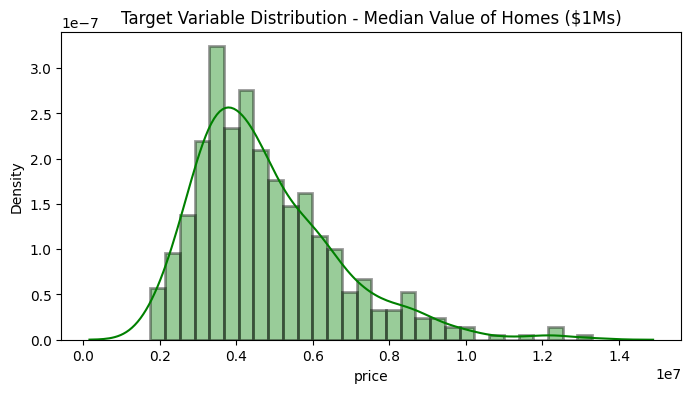

In [9]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(data[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference**:The Target Variable seems to be be normally distributed, averaging around 20 units.

                                                Numeric Features Distribution                                                 


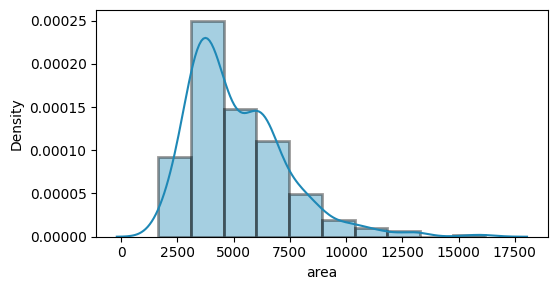

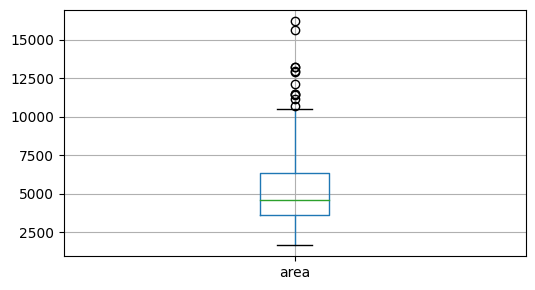

In [25]:
#Visualising the numeric features 
import numpy as np
print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

## Pairplot

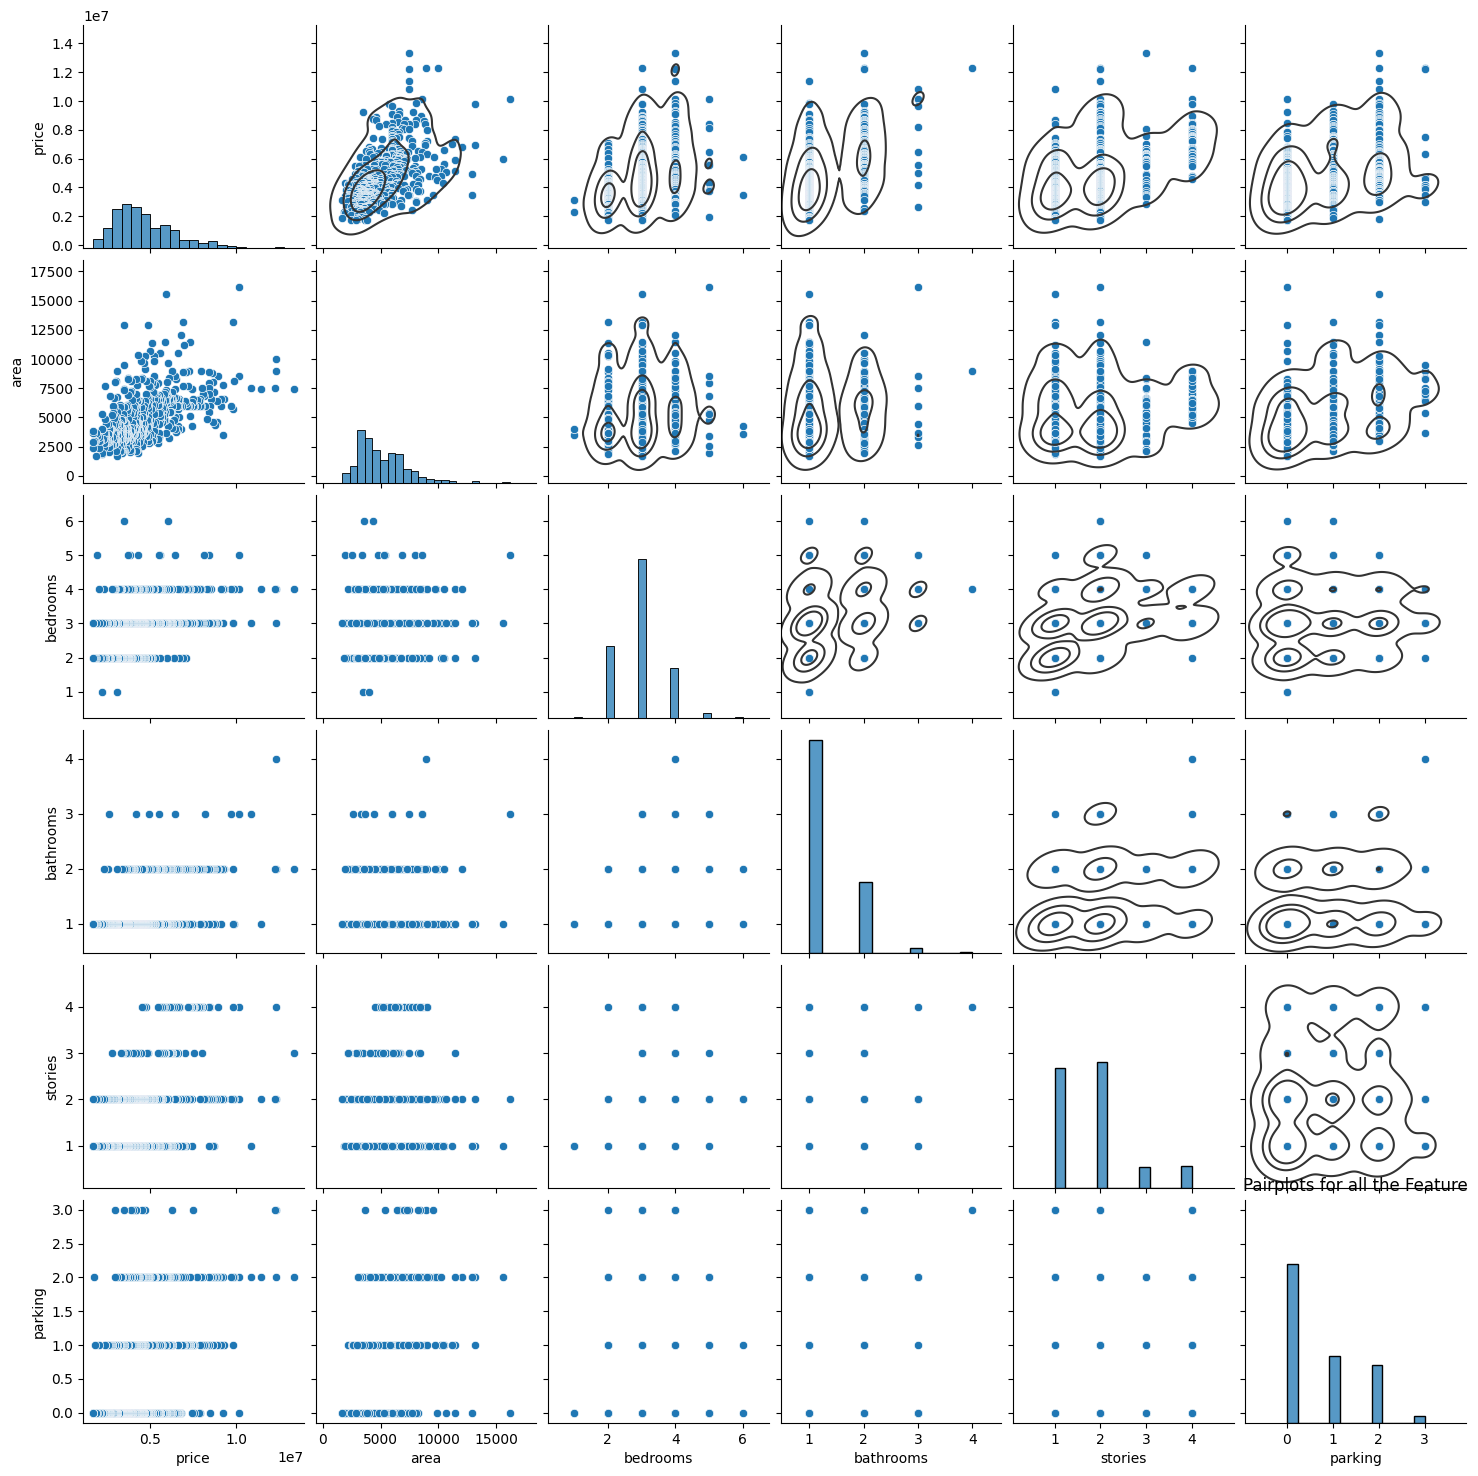

In [27]:
#Understanding the relationship between all the features

g = sns.pairplot(data)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

## Plot histograms and distribution of our variables

### Separate numeric and categorical variables

In [13]:
numeric_features = (list(data.select_dtypes("int64").columns))
categorical_features = list(data.select_dtypes("object").columns)

print(f'Variables numériques :\n{numeric_features}\n\nVariables catégorielles:\n{categorical_features}')

Variables numériques :
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Variables catégorielles:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


### Distributions

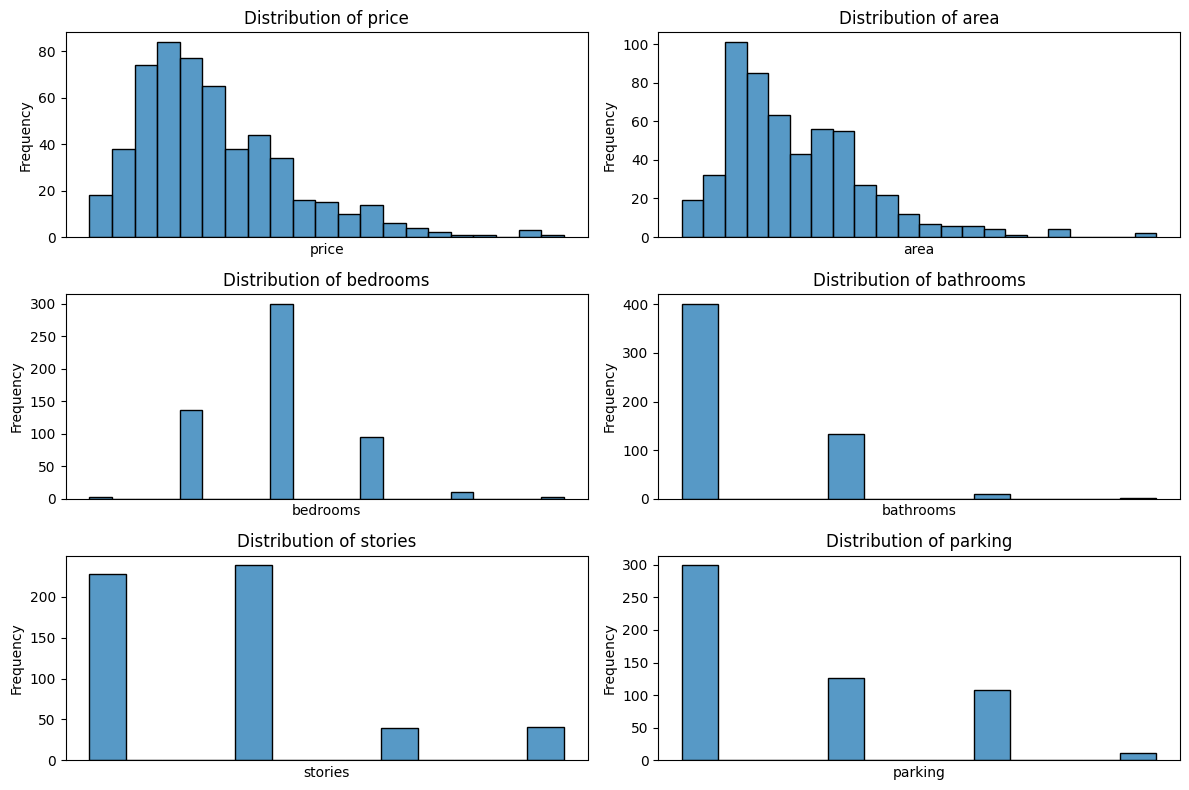

In [21]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for feature in numeric_features:
    row = numeric_features.index(feature) // 2
    col = numeric_features.index(feature) % 2
    ax = axes[row, col]
    sns.histplot(data[feature], ax=ax)
    ax.set_xticks([])
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Histrograms

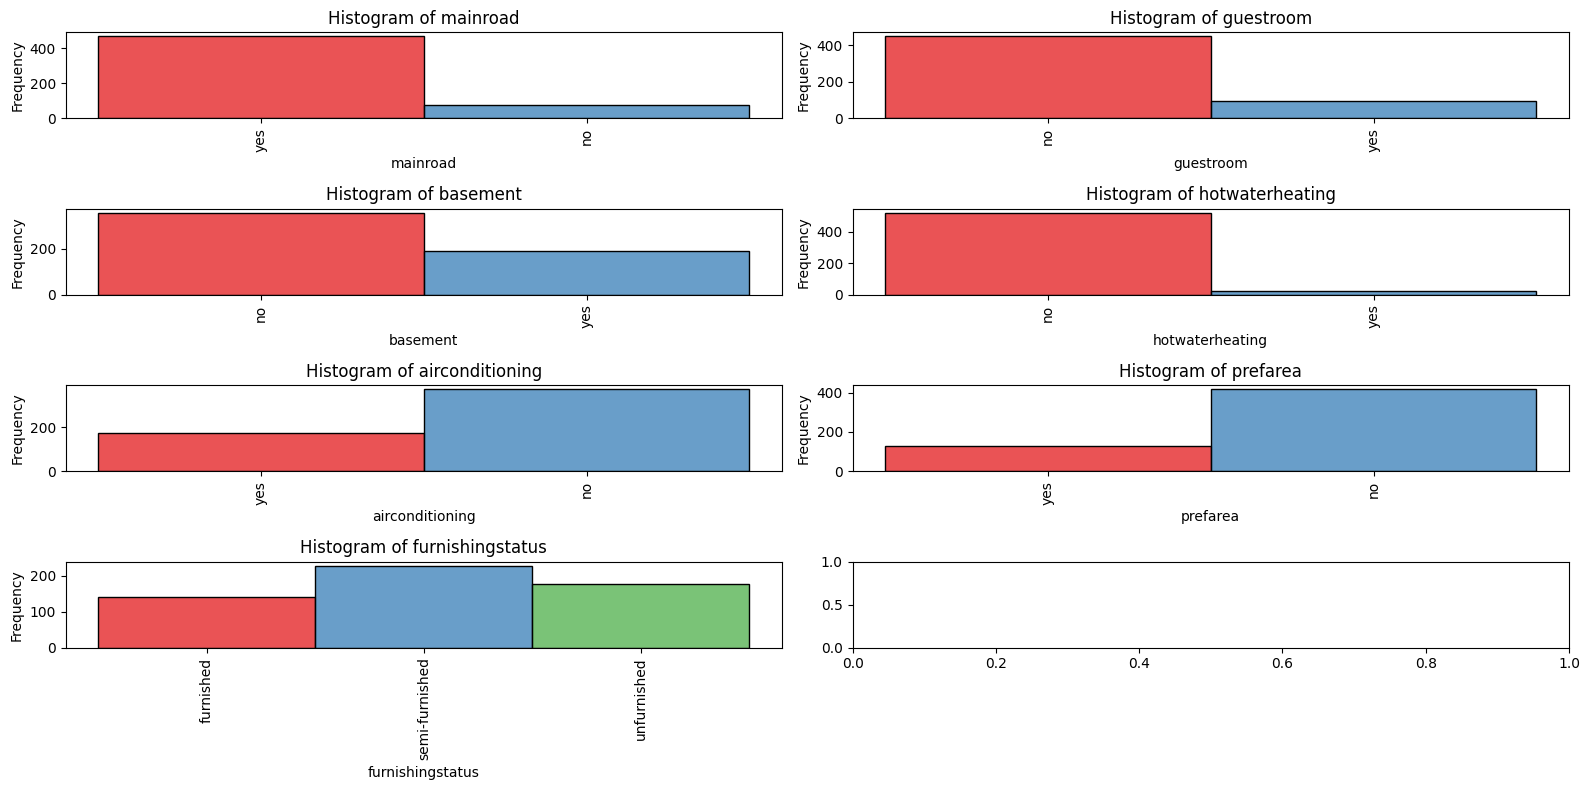

In [15]:
import math
fig, axes = plt.subplots(nrows=math.ceil(len(categorical_features)/2), ncols=2, figsize=(16, 8))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    unique_values = data[feature].unique()
    colors = sns.color_palette("Set1", len(unique_values))
    for j, value in enumerate(unique_values):
        sns.histplot(data[data[feature] == value][feature], ax=ax, color=colors[j])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(feature)

    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()



In [22]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = data.shape

data.drop_duplicates(inplace=True)

if data.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [23]:
#Check for empty elements

nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [24]:
#Removal of outlier:

df1 = data.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Inference:
Before removal of outliers, The dataset had 545 samples.
After removal of outliers, The dataset now has 533 samples.


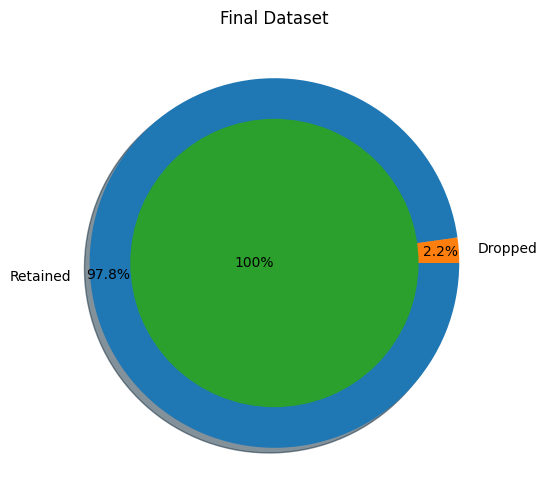


Inference: After the cleanup process, 12 samples were dropped, while retaining 2.2% of the data.


In [25]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], data.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {data.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(data.shape[0])),2)}% of the data.')

# Create a setup for regresssion

In [27]:
from pycaret.regression import *
s = setup(df, 
          target = 'price', 
          session_id = 123, 
          train_size=0.7,
          fold_strategy="kfold",
          fold=10,
          numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
          categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'],
          profile = True
          )

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(533, 13)"
4,Transformed data shape,"(533, 15)"
5,Transformed train set shape,"(373, 15)"
6,Transformed test set shape,"(160, 15)"
7,Numeric features,5
8,Categorical features,7
9,Preprocess,True


Loading profile... Please Wait!


# Train models

In [28]:
best_model = compare_models(sort="rmse", n_select=3)
best_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,789776.0530,1153845491288.3972,1053788.6166,0.6374,0.2127,0.1761,0.0720
llar,Lasso Least Angle Regression,791676.9100,1155854576866.4331,1054799.2675,0.6366,0.2131,0.1765,0.0650
lasso,Lasso Regression,791677.0606,1155854845468.1479,1054799.3971,0.6366,0.2131,0.1765,0.0960
lr,Linear Regression,791677.9237,1155854748660.1885,1054799.4276,0.6366,0.2131,0.1765,1.9730
lar,Least Angle Regression,791677.9237,1155854748660.1870,1054799.4276,0.6366,0.2131,0.1765,0.0670
rf,Random Forest Regressor,789219.5988,1300734694419.5417,1107466.3918,0.6053,0.2207,0.1748,0.2570
gbr,Gradient Boosting Regressor,795750.9078,1303364641310.4011,1109001.5320,0.6019,0.2196,0.1760,0.1310
lightgbm,Light Gradient Boosting Machine,813304.4989,1313292815428.6743,1123776.1365,0.5901,0.2237,0.1802,0.5890
et,Extra Trees Regressor,822503.6631,1357447521462.8782,1132332.1325,0.5897,0.2283,0.1844,0.1880
en,Elastic Net,845926.9778,1431696704499.5481,1180647.9708,0.5423,0.2333,0.1910,0.0660


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

[Ridge(random_state=123), LassoLars(random_state=123), Lasso(random_state=123)]

In [29]:
# Highlight the minimum value of each column
highlight_min = lambda x: ['background-color: yellow' if v == x.min() else '' for v in x]
pull().style.apply(highlight_min, axis=0)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,789776.053000,1153845491288.397217,1053788.616600,0.637400,0.212700,0.176100,0.072000
llar,Lasso Least Angle Regression,791676.910000,1155854576866.433105,1054799.267500,0.636600,0.213100,0.176500,0.065000
lasso,Lasso Regression,791677.060600,1155854845468.147949,1054799.397100,0.636600,0.213100,0.176500,0.096000
lr,Linear Regression,791677.923700,1155854748660.188477,1054799.427600,0.636600,0.213100,0.176500,1.973000
lar,Least Angle Regression,791677.923700,1155854748660.187012,1054799.427600,0.636600,0.213100,0.176500,0.067000
rf,Random Forest Regressor,789219.598800,1300734694419.541748,1107466.391800,0.605300,0.220700,0.174800,0.257000
gbr,Gradient Boosting Regressor,795750.907800,1303364641310.401123,1109001.532000,0.601900,0.219600,0.176000,0.131000
lightgbm,Light Gradient Boosting Machine,813304.498900,1313292815428.674316,1123776.136500,0.590100,0.223700,0.180200,0.589000
et,Extra Trees Regressor,822503.663100,1357447521462.878174,1132332.132500,0.589700,0.228300,0.184400,0.188000
en,Elastic Net,845926.977800,1431696704499.548096,1180647.970800,0.542300,0.233300,0.191000,0.066000


**The best model here is Ridge Regression model**

# Analyze model

### Model 1

In [30]:
evaluate_model(best_model[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Model 2

In [31]:
evaluate_model(best_model[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Model 3

In [32]:
evaluate_model(best_model[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Fine tuning of selected models

In [33]:
tuned_models = [tune_model(model) for model in best_model]
tuned_models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,538471.9223,536577619471.9460,732514.5865,0.7823,0.1769,0.1376
1,885029.3974,1360258414644.7991,1166301.1681,0.6075,0.2674,0.2315
2,969985.6680,1868008881094.7463,1366751.2140,0.5764,0.2341,0.1849
3,672442.6024,824997482789.1949,908293.7205,0.7370,0.1935,0.1547
4,706481.9937,783087787743.3053,884922.4756,0.6998,0.1861,0.1503
5,713616.1942,770103401430.8215,877555.3552,0.7559,0.1849,0.1655
6,761611.9733,937181067869.6066,968081.1267,0.5880,0.1955,0.1678
7,966908.3556,1918694280754.3269,1385169.4051,0.6589,0.2371,0.1826
8,758116.6646,1051988018778.4976,1025664.6717,0.3361,0.2258,0.1950


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,530320.8397,504159260606.2065,710041.7316,0.7955,0.1741,0.1358
1,897035.0926,1349081489062.2910,1161499.6724,0.6107,0.2670,0.2334
2,973958.1049,1870484573604.4067,1367656.5993,0.5759,0.2332,0.1849
3,702954.9186,895494131930.0310,946305.5172,0.7145,0.2043,0.1633
4,712936.4411,790485328688.8597,889092.4185,0.6969,0.1889,0.1514
5,715385.4629,770196966674.9839,877608.6637,0.7559,0.1836,0.1643
6,789669.1289,976460222319.5054,988160.0186,0.5708,0.2031,0.1754
7,977708.2353,1913314321887.3928,1383226.0560,0.6598,0.2394,0.1857
8,755781.7513,1052530711026.1364,1025929.1940,0.3358,0.2251,0.1928


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,530333.9473,504183764826.5137,710058.9869,0.7955,0.1741,0.1358
1,897031.5791,1349088946114.9934,1161502.8825,0.6107,0.2670,0.2334
2,973964.6128,1870525647461.1973,1367671.6154,0.5759,0.2332,0.1849
3,702913.2220,895414955891.6553,946263.6820,0.7145,0.2043,0.1633
4,712945.8257,790489624621.6265,889094.8344,0.6969,0.1889,0.1514
5,715381.4353,770191569623.5212,877605.5889,0.7559,0.1836,0.1643
6,789660.7943,976431226824.4062,988145.3470,0.5708,0.2031,0.1754
7,977693.3439,1913301038947.7507,1383221.2545,0.6598,0.2394,0.1857
8,755777.7236,1052515673764.6309,1025921.8653,0.3358,0.2251,0.1928


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


[Ridge(alpha=6.95, fit_intercept=False, random_state=123),
 LassoLars(random_state=123),
 Lasso(random_state=123)]

In [34]:
best_model_tuned = compare_models(tuned_models, sort="rmse", n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Ridge Regression,780573.0849,1146128927581.3801,1050285.3118,0.6399,0.2112,0.1742,0.1400
1,Lasso Least Angle Regression,791676.9100,1155854576866.4331,1054799.2675,0.6366,0.2131,0.1765,0.1300
2,Lasso Regression,791677.0606,1155854845468.1479,1054799.3971,0.6366,0.2131,0.1765,0.0880


Processing:   0%|          | 0/19 [00:00<?, ?it/s]

# Finalization of best model

In [35]:
final_model = finalize_model(best_model_tuned[0])

# Save our pipeline model

In [36]:
save_model(final_model, 'House price predictor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['area', 'bedrooms', 'bathrooms',
                                              'stories', 'parking'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['mainroad', 'guestroom',
                                              'basement', 'hotwaterheating',
                                              'airconditioning', 'prefarea',
                                              'furnishingstatus'],
                                     transformer=SimpleImput...
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64},
                                                                         {'col': 'prefarea',
                                                                          'data_type'

# Load our model

In [37]:
loaded_best_pipeline = load_model('House price predictor')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['area', 'bedrooms', 'bathrooms',
                                             'stories', 'parking'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['mainroad', 'guestroom',
                                             'basement', 'hotwaterheating',
                                             'airconditioning', 'prefarea',
                                             'furnishingstatus'],
                                    transformer=...
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64},
                                                                        {'col': 'prefarea',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['furnishingstatus'],
                                    transformer=OneHotEncoder(cols=['furnishingstatus'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 Ridge(alpha=6.95, fit_intercept=False, random_state=123))])

# Use model to make predictions

## Make a copy of our dataset

In [38]:
new_data = data.copy()
new_data.drop('price', axis=1, inplace=True)
new_data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Make predictions

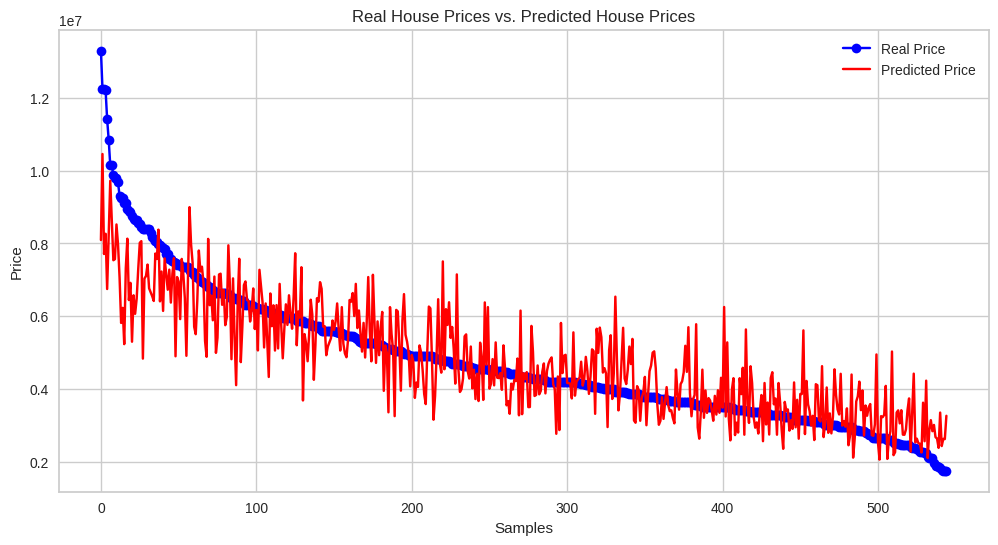

In [43]:
predictions = predict_model(loaded_best_pipeline, data = new_data)
predictions.head()
import matplotlib.pyplot as plt

real_price = data['price']
predicted_price = predictions["prediction_label"]

# Create a graphic
plt.figure(figsize=(12, 6))

# Plot real price in blue
plt.plot(real_price, label='Real Price', color='blue', marker='o')

# Plot predicted price in red
plt.plot(predicted_price, label='Predicted Price', color='red', marker='x')

# Legends and title
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Real House Prices vs. Predicted House Prices')
plt.legend()

# Show graphic
plt.show()
import plotly.express as px

fig = px.line(real_vs_pred, x=real_vs_pred.index, y=['price', 'prediction_label'], title='Real House Prices vs. Predicted House Prices')
fig.show()

## Compare predictions and real price

In [40]:
real_vs_pred = pd.DataFrame([data["price"], predictions["prediction_label"]]).T
real_vs_pred

,price,prediction_label
0,13300000.0,8.094621e+06
1,12250000.0,1.045929e+07
2,12250000.0,7.709512e+06
3,12215000.0,8.266316e+06
4,11410000.0,6.747081e+06
...,...,...
540,1820000.0,3.348693e+06
541,1767150.0,2.428618e+06
542,1750000.0,2.625823e+06
543,1750000.0,2.619476e+06


## Visualize Prediction vs Reality

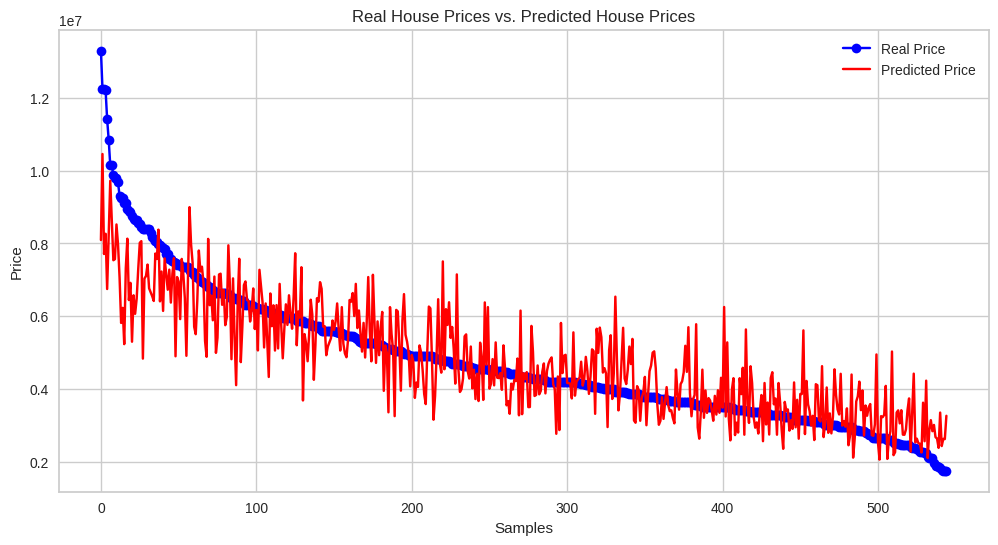

In [41]:
import matplotlib.pyplot as plt

real_price = data['price']
predicted_price = predictions["prediction_label"]

# Create a graphic
plt.figure(figsize=(12, 6))

# Plot real price in blue
plt.plot(real_price, label='Real Price', color='blue', marker='o')

# Plot predicted price in red
plt.plot(predicted_price, label='Predicted Price', color='red', marker='x')

# Legends and title
plt.xlabel('Samples')
plt.ylabel('Price')
plt.title('Real House Prices vs. Predicted House Prices')
plt.legend()

# Show graphic
plt.show()


In [1]:
import pycaret

In [2]:
pycaret.__version__

'3.3.2'